<a href="https://www.kaggle.com/code/bhavinmoriya/python-for-finance-stochastic-1?scriptVersionId=115500814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We shall discuss the chapter on Stochastic from  : https://www.amazon.com.br/Python-Finance-2e-Yves-Hilpisch/dp/1492024333

**PS : Drift = Mean and Standard deviation = volatility = risk**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined aby the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import numpy.random as npr
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime as dt, timedelta as td
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
sample_size = 500
rn1 = npr.rand(sample_size, 4)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

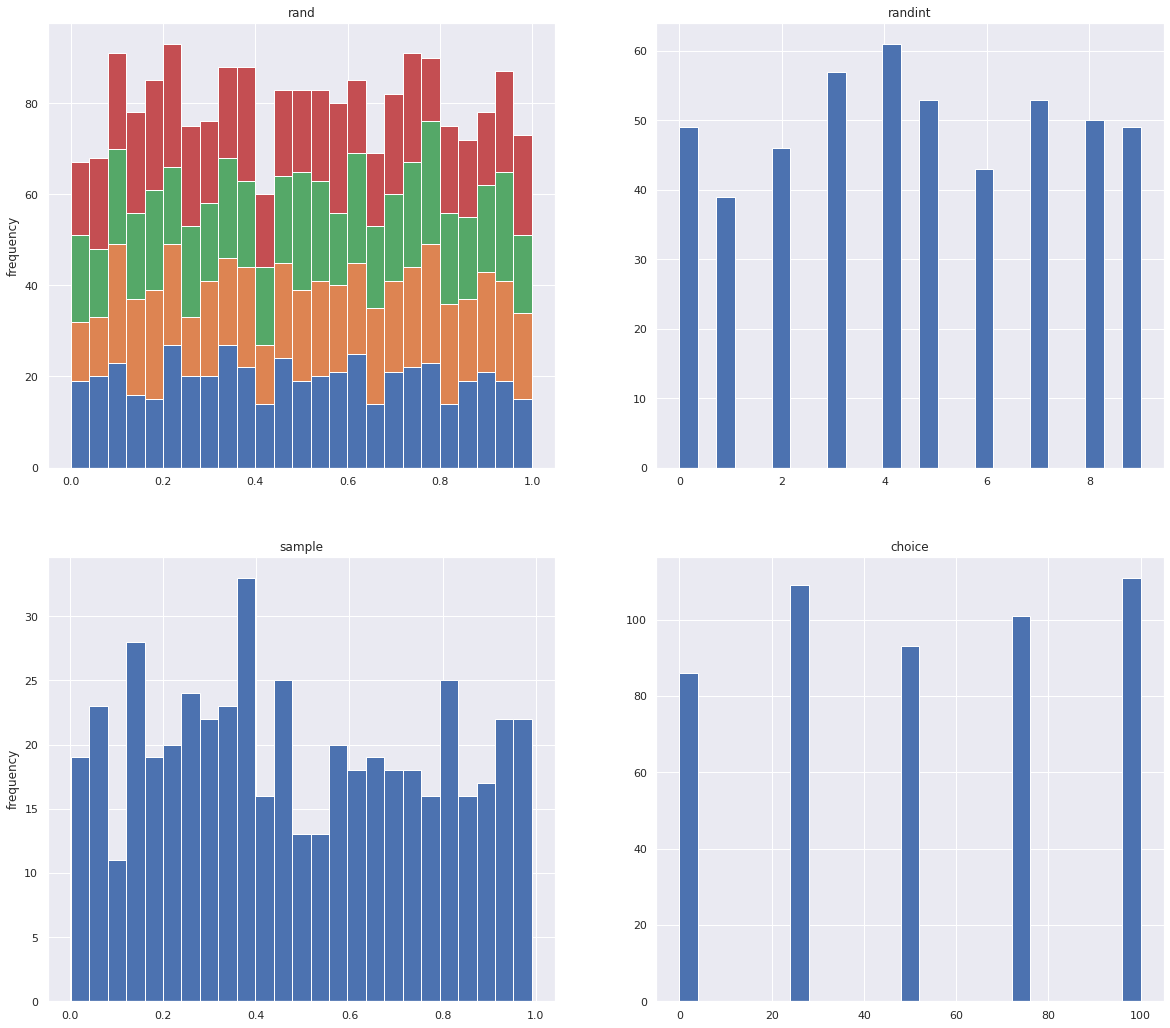

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
figsize=(20, 18))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');

In [4]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

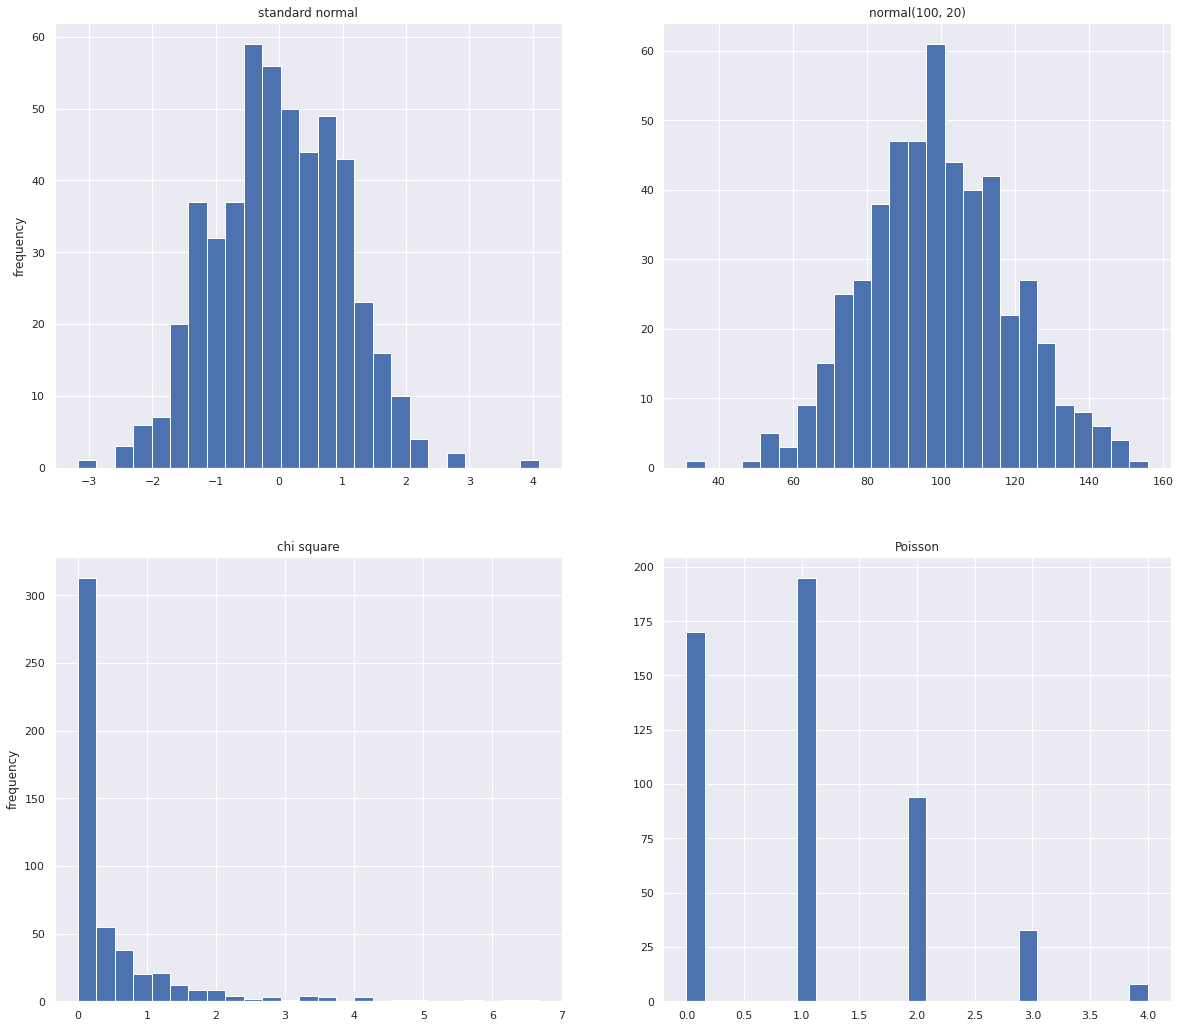

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
figsize=(20, 18))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

# Simulating future index level in Black-Scholes-Merton setup

In [6]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
sigma * math.sqrt(T) * npr.standard_normal(I))

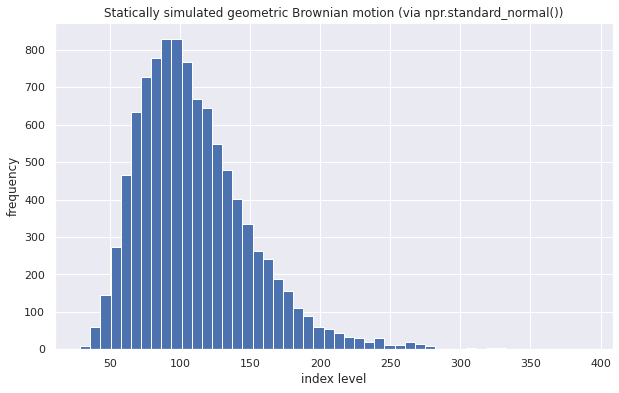

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.title('Statically simulated geometric Brownian motion (via npr.standard_normal())')
plt.ylabel('frequency');

Note that,

$$np.exp((r - 0.5 * sigma ** 2) * T +
sigma * math.sqrt(T) * npr.standard_normal(I))$$

is a log-normal distribution (X is lognormal if X = exp(Y), where Y is normal. If X is lognormal then if ln(X) is normal). Hence we could infact have used log normal distribution in simulation. We shall do so next,

**PS. Note that mean of $$(r - 0.5 * sigma ** 2) * T +
sigma * math.sqrt(T) * npr.standard_normal(I)$$ 
is $$(r - 0.5 * sigma ** 2) * T$$ and variance is $$sigma * math.sqrt(T)$$**

In [8]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
sigma * math.sqrt(T), size=I)

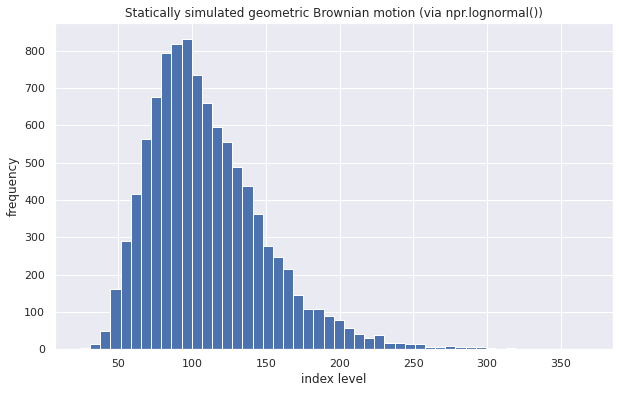

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.title('Statically simulated geometric Brownian motion (via npr.lognormal())')
plt.ylabel('frequency');

Indeed both plots look pretty similar. This can be
verified a bit more rigorously by comparing statistical moments of the resulting dis‐
tributions. To compare the distributional characteristics of simulation results, the
scipy.stats subpackage and the helper function print_statistics()

In [10]:
import scipy.stats as scs

def print_statistics(a1, a2):
    ''' Prints selected statistics.
    Parameters
    ==========
    a1, a2: ndarray objects
    results objects from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
    ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),
                                   np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))
    

In [11]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.741         24.169
           max        390.586        367.923
          mean        110.298        110.434
           std         40.687         40.071
          skew          1.180          1.143
      kurtosis          2.465          2.256


# Stochastic Differential Equation

I found following quite useful
https://www.youtube.com/watch?v=O0dOlr_XbdM 

In [12]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
A = (r - 0.5 * sigma ** 2) * dt
B = sigma * math.sqrt(dt)
           
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp(A + B * npr.standard_normal(I))

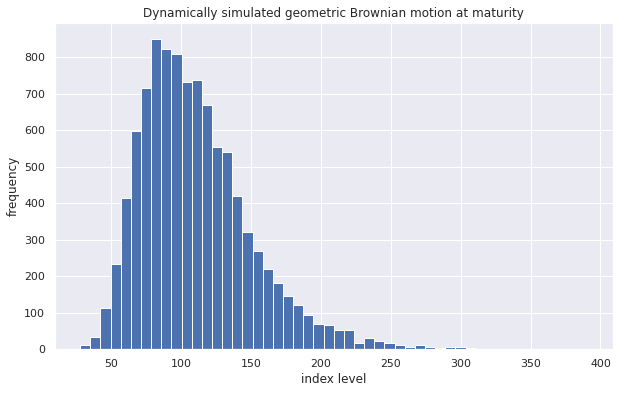

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.title('Dynamically simulated geometric Brownian motion at maturity')
plt.ylabel('frequency');

In [14]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.628         24.169
           max        390.585        367.923
          mean        110.655        110.434
           std         40.224         40.071
          skew          1.136          1.143
      kurtosis          2.169          2.256


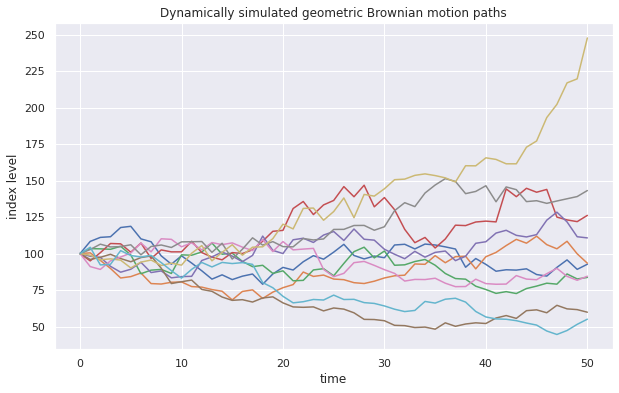

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.title('Dynamically simulated geometric Brownian motion paths')
plt.ylabel('index level');

# Square-root diffusion
Another important class of financial processes is mean-reverting processes, which are
used to model short rates or volatility processes, for example. A popular and widely
used model is the square-root diffusion, as proposed by Cox, Ingersoll, and Ross
(1985).

In [16]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T / M

In [17]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +\
                kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +\
                sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *\
                math.sqrt(dt) * npr.standard_normal(I))
        x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

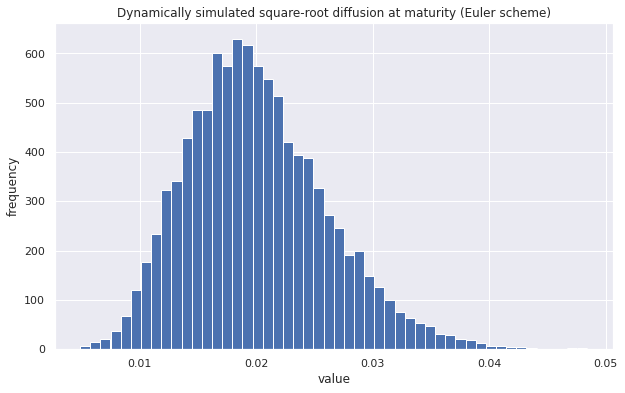

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.title('Dynamically simulated square-root diffusion at maturity (Euler scheme)')
plt.ylabel('frequency');

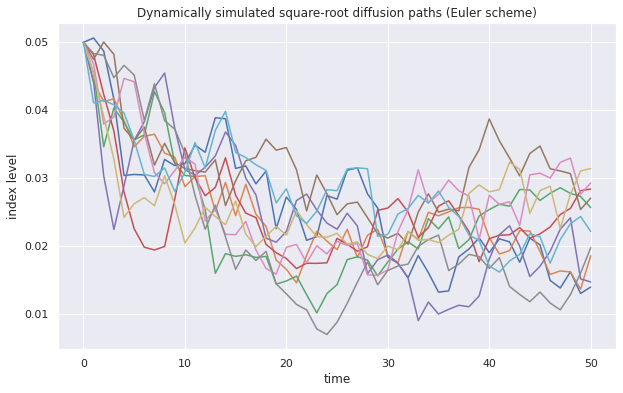

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.title('Dynamically simulated square-root diffusion paths (Euler scheme)')
plt.ylabel('index level');

The first 10 simulated paths, illustrating the resulting negative
average drift (due to $x_0 > θ $) and the convergence to $θ$ = 0.02.

The exact discretization scheme for the square-root diffusion
based on the noncentral chi-square distribution $\chi_d^2.$ The Python implementation of this discretization scheme is a bit more involved but
still quite concise.

In [20]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

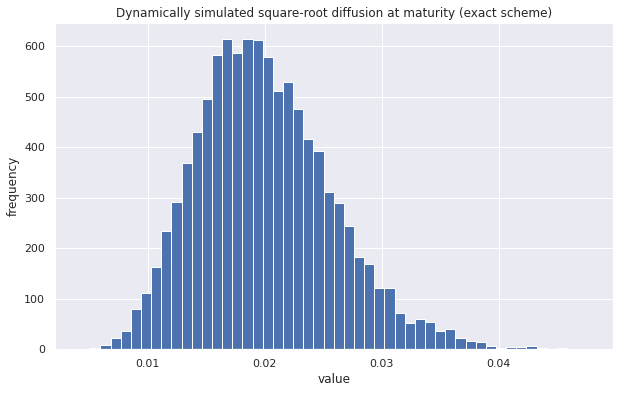

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.title('Dynamically simulated square-root diffusion at maturity (exact scheme)')
plt.ylabel('frequency');

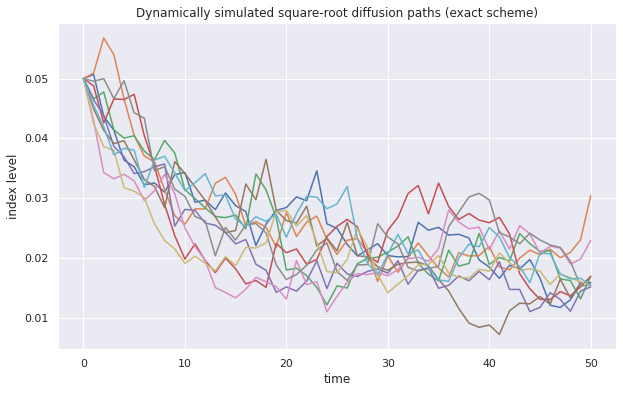

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.title('Dynamically simulated square-root diffusion paths (exact scheme)')
plt.xlabel('time')
plt.ylabel('index level');

Comparing the main statistics from the different approaches reveals that the biased
Euler scheme indeed performs quite well when it comes to the desired statistical
properties:

In [23]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.004
           max          0.048          0.048
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.558          0.568
      kurtosis          0.388          0.464


# Stochastic volatility
One of the major simplifying assumptions of the Black-Scholes-Merton model is the
constant volatility. However, volatility in general is neither constant nor deterministic
— it is stochastic (i.e random). Therefore, a major advancement with regard to financial modeling
was achieved in the early 1990s with the introduction of so-called stochastic volatility
models. One of the most popular models that fall into that category is that of Heston
(1993).

It is good to remember -- the leverage effect, which in essence states that volatility goes up in times of stress (declining markets) and goes down in times of a bull market (rising markets).


Consider the following parameterization of the model. To account for the correlation
between the two stochastic processes, one needs to determine the Cholesky decom‐
position of the correlation matrix

In [24]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

Before the start of the simulation of the stochastic processes the whole set of random
numbers for both processes is generated, looking to use set 0 for the index process
and set 1 for the volatility process. For the volatility process modeled by a square-root
diffusion, the Euler scheme is chosen, taking into account the correlation via the
Cholesky matrix:

In [25]:
M = 50
I = 10000
dt = T / M
ran_num = npr.standard_normal((2, M + 1, I))
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
             math.sqrt(dt) * ran[1])
v = np.maximum(vh, 0)

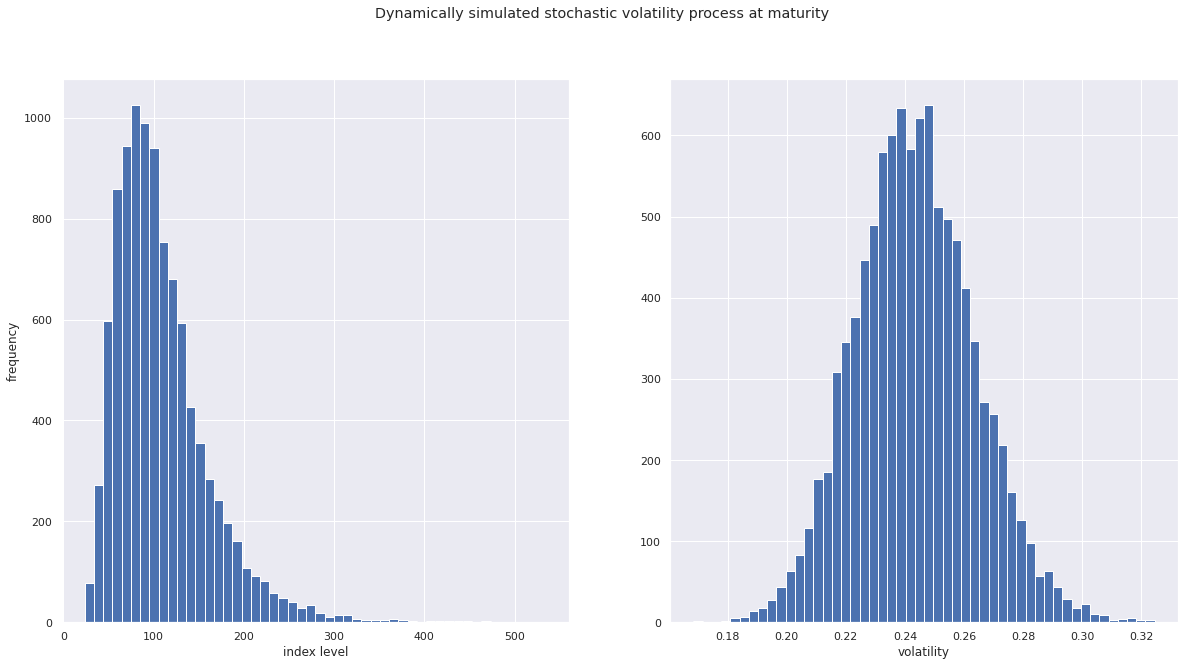

In [26]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                             np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
plt.suptitle('Dynamically simulated stochastic volatility process at maturity');

This illustrates another advantage of working with the Euler scheme for the square-
root diffusion: correlation is easily and consistently accounted for since one only draws
standard normally distributed random numbers. There is no simple way of achieving
the same with a mixed approach (i.e., using Euler for the index and the noncentral
chi-square-based exact approach for the volatility process).

An inspection of the first 10 simulated paths of each process (see Figure 12-12) shows
that the volatility process is drifting positively on average and that it, as expected,
converges to $θ = 0.25$:

In [27]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         23.756          0.168
           max        534.718          0.325
          mean        108.640          0.243
           std         52.536          0.020
          skew          1.686          0.198
      kurtosis          5.119          0.140


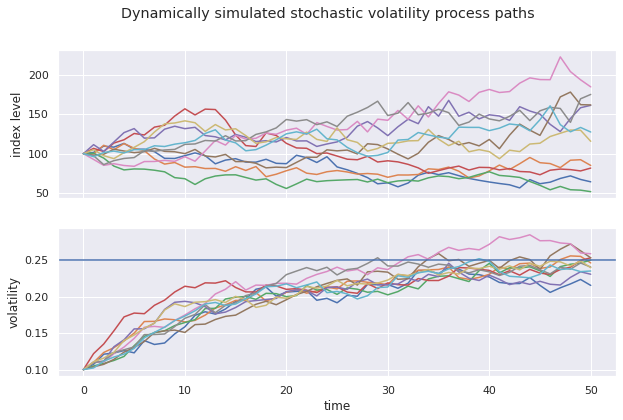

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.axhline(theta)
plt.suptitle('Dynamically simulated stochastic volatility process paths');

Having a brief look at the statistics for the maturity date for both data sets reveals a
pretty high maximum value for the index level process. In fact, this is much higher
than a geometric Brownian motion with constant volatility could ever climb, ceteris
paribus.

# Jump diffusion
Stochastic volatility and the leverage effect are stylized (empirical) facts found in a
number of markets. Another important stylized fact is the existence of jumps in asset
prices and, for example, volatility. In 1976, Merton published his jump diffusion
model, enhancing the Black-Scholes-Merton setup through a model component gen‐
erating jumps with log-normal distribution.

In [29]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)
T = 1.0
M = 50
I = 10000
dt = T / M

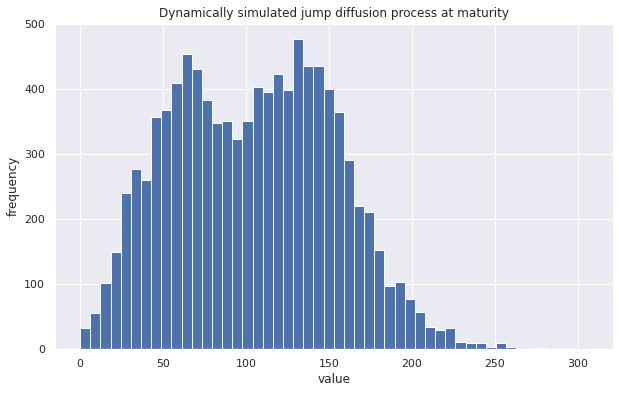

In [30]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +\
    sigma * math.sqrt(dt) * sn1[t]) +\
    (np.exp(mu + delta * sn2[t]) - 1) *\
    poi[t])
    S[t] = np.maximum(S[t], 0)

plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Dynamically simulated jump diffusion process at maturity');


The negative jumps can also be spotted in the first 10 simulated index level paths, as
presented below,

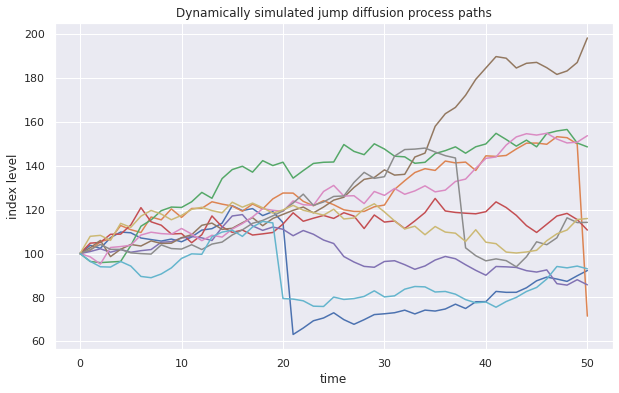

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Dynamically simulated jump diffusion process paths');

We shall continue this notebook with,
